In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:

spotify_data = pd.read_csv('music.csv')

print("First few rows of the dataset:")
print(spotify_data.head())

First few rows of the dataset:
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care 

In [4]:
missing_values = spotify_data.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
track_name          5
track_artist        5
track_album_name    5
dtype: int64


In [5]:
spotify_data_cleaned = spotify_data.dropna()

missing_values_cleaned = spotify_data_cleaned.isnull().sum()
print("Columns with missing values after cleaning:")
print(missing_values_cleaned[missing_values_cleaned > 0])

Columns with missing values after cleaning:
Series([], dtype: int64)


In [6]:
data_types = spotify_data_cleaned.dtypes
print("Data types of the columns:")
print(data_types)


Data types of the columns:
track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object


In [7]:
categorical_features = spotify_data_cleaned.select_dtypes(include=['object']).nunique()
print("Unique values for categorical features:")
print(categorical_features)

Unique values for categorical features:
track_id                    28352
track_name                  23448
track_artist                10692
track_album_id              22543
track_album_name            19741
track_album_release_date     4529
playlist_name                 449
playlist_id                   471
playlist_genre                  6
playlist_subgenre              24
dtype: int64


In [8]:
print("Column names:")
print(spotify_data_cleaned.columns)

Column names:
Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')


In [9]:
spotify_data_encoded = pd.get_dummies(
    spotify_data_cleaned, 
    columns=['playlist_genre', 'track_artist', 'playlist_name']
)

In [10]:
spotify_data_encoded['track_album_release_date'] = pd.to_datetime(
    spotify_data_encoded['track_album_release_date'], 
    format='%d-%m-%Y',  # Adjust the format if needed
    errors='coerce',
    dayfirst=True
)

In [11]:
spotify_data_encoded = spotify_data_encoded.dropna(subset=['track_album_release_date'])

print("Columns with missing values after additional cleaning:")
print(spotify_data_encoded.isnull().sum()[spotify_data_encoded.isnull().sum() > 0])

Columns with missing values after additional cleaning:
Series([], dtype: int64)


In [12]:
np.random.seed(42)
spotify_data_encoded['repeated_play'] = np.random.randint(2, size=len(spotify_data_encoded))

# Split the dataset into features and target variable
features = spotify_data_encoded.drop(columns=['repeated_play'])
target = spotify_data_encoded['repeated_play']

# Ensure only numeric features are included
features_numeric = features.select_dtypes(include=[np.number])

# Normalize the numeric features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_numeric)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.5035010233760637
Precision: 0.5042772537837245
Recall: 0.4946213425129088
F1 Score: 0.4994026284348865


In [14]:
def recommend_songs(user_id, model, df, scaler, features, top_n=5):
    user_data = df.copy()
    user_data_scaled = scaler.transform(user_data[features])
    user_data['probability'] = model.predict_proba(user_data_scaled)[:, 1]
    recommendations = user_data.sort_values(by='probability', ascending=False).head(top_n)
    return recommendations[['track_id', 'track_name', 'probability']]

user_id = 1
recommendations = recommend_songs(user_id, rf, spotify_data_encoded, scaler, features_numeric.columns)
print(recommendations)


                     track_id                   track_name  probability
23771  6fTt0CH2t0mdeB2N9XFG5r                       Panini          1.0
1391   5N4erncE7kuUccm7zEmwzk  Electricity (with Dua Lipa)          1.0
18768  59s0s39NFWScuHDbHytI14                     Indeciso          1.0
18756  7k4t7uLgtOxPwTpFmtJNTY                         Tusa          1.0
1363   6fTt0CH2t0mdeB2N9XFG5r                       Panini          1.0


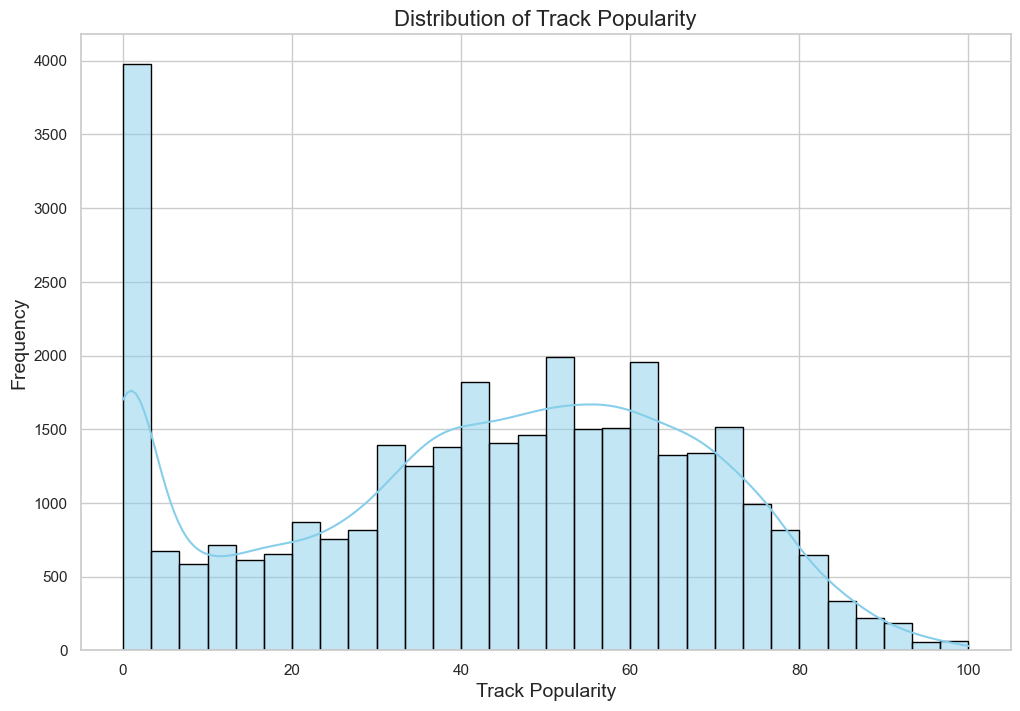

In [15]:
sns.set(style="whitegrid")

# Plot 1: Histogram of Track Popularity
plt.figure(figsize=(12, 8))
sns.histplot(spotify_data_cleaned['track_popularity'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity', fontsize=16)
plt.xlabel('Track Popularity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7368\391416968.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


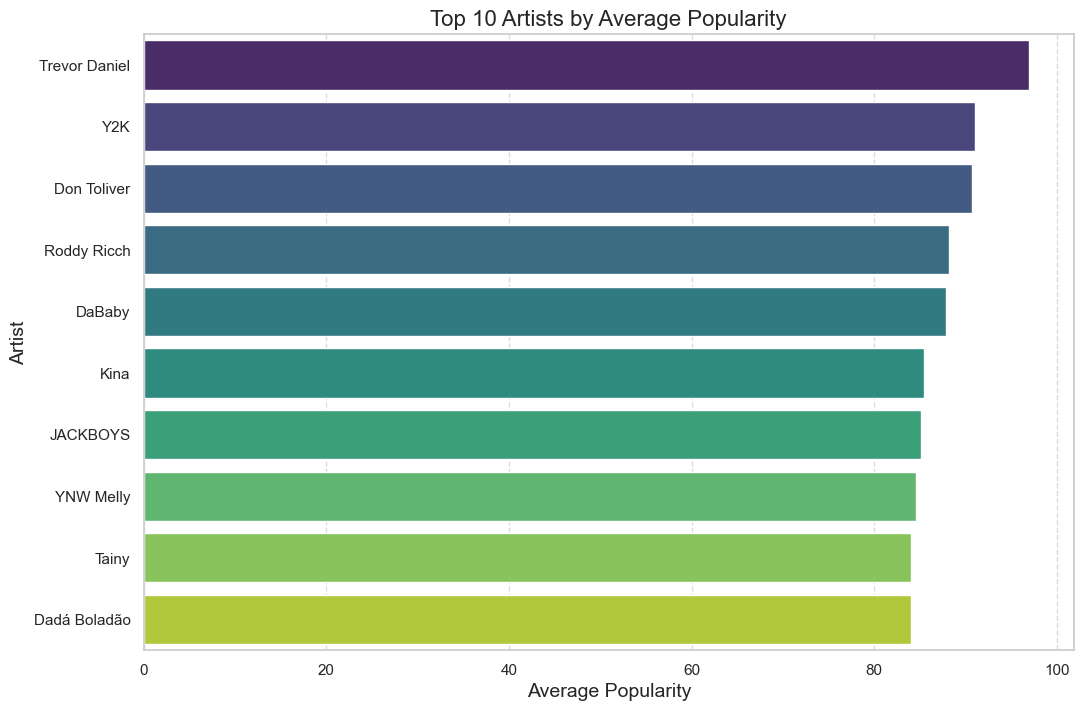

In [16]:
# Plot 2: Bar Plot of Top 10 Artists by Popularity
top_artists = spotify_data_cleaned.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Artists by Average Popularity', fontsize=16)
plt.xlabel('Average Popularity', fontsize=14)
plt.ylabel('Artist', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

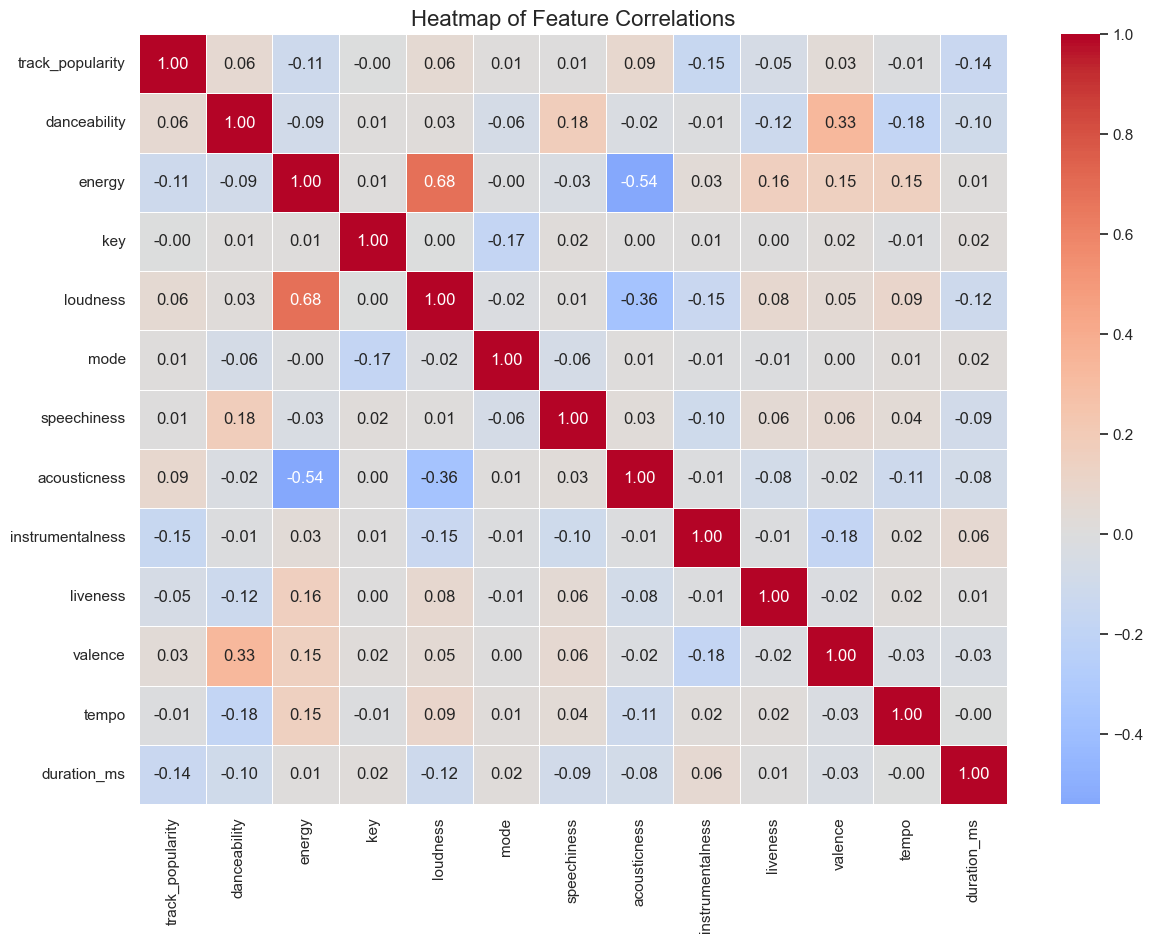

In [17]:

# Plot 3: Heatmap of Feature Correlations
numeric_features = spotify_data_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numeric_features.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)
plt.title('Heatmap of Feature Correlations', fontsize=16)
plt.show()

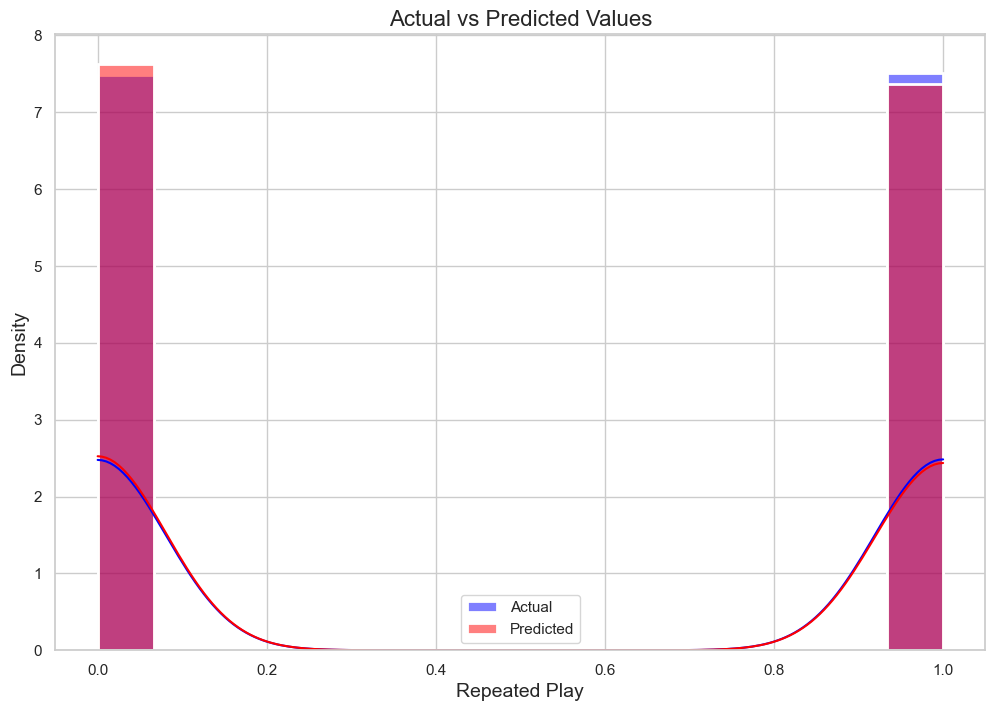

In [18]:
# Plot 4: Actual vs Predicted Values
plt.figure(figsize=(12, 8))
sns.histplot(y_test, color='blue', label='Actual', kde=True, stat='density', linewidth=2)
sns.histplot(y_pred, color='red', label='Predicted', kde=True, stat='density', linewidth=2)
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Repeated Play', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
